In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
# https://github.com/caiocarneloz/masksemi
from masksemi.masksemi import maskData
# https://www.kaggle.com/semisupervised/semi-supervised-sklearn

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data_2/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data_2/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

classes = ['No', '>30', '<30']

X_cs_15.shape, y_cs_15.shape (74652, 15) (74652,)


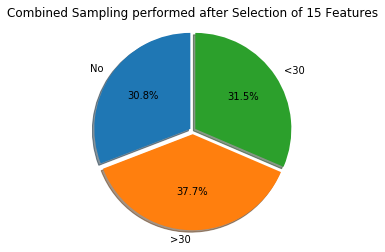

In [3]:
plot_pie_chart(classes, y_cs_15, 15)

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [5]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

In [45]:
trainer = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, data_classes=data_classes_15, classes=classes)

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   3.8172000000000006  |
|    Accuracy   |   0.9508385305189734  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9308325865000722 | 0.951930425418858  | 0.9700356978842273 |
|     Recall     |  0.95865919985755  | 0.9374979454415312 | 0.9591584153030432 |
|  Specificity   | 0.9682125138163442 | 0.9713389371420187 | 0.9863985437136767 |
|    F1-score    | 0.9445317518371039 | 0.9446492255683523 | 0.9645570350634148 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

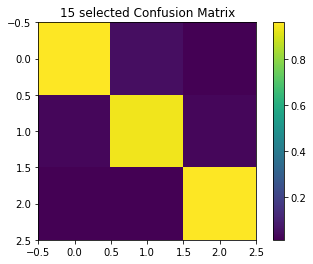

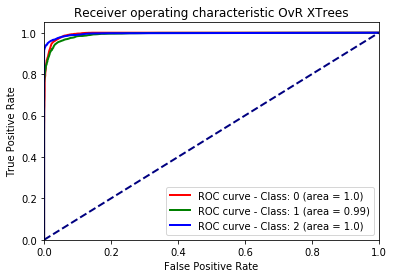

In [7]:
tables, xtrees_metrics_15 = trainer.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

### Unlabel Data 

In [8]:
X_ssl_10, y_ssl_10 = X_cs_15, maskData(y_cs_15, 1. - 0.1)
X_ssl_20, y_ssl_20 = X_cs_15, maskData(y_cs_15, 1. - 0.2)
X_ssl_50, y_ssl_50 = X_cs_15, maskData(y_cs_15, 1. - 0.5)
X_ssl_90, y_ssl_90 = X_cs_15, maskData(y_cs_15, 1. - 0.9)
X_ssl_95, y_ssl_95 = X_cs_15, maskData(y_cs_15, 1. - 0.95)

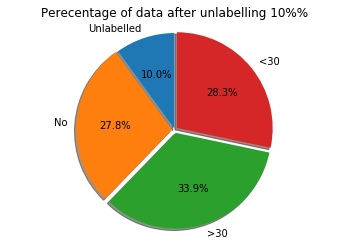

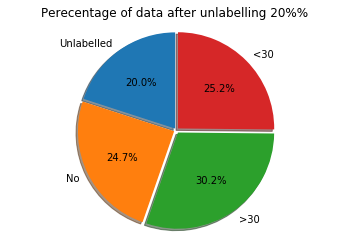

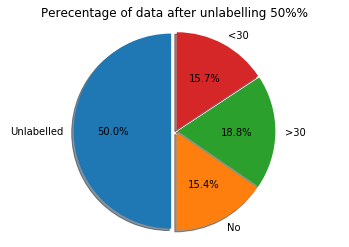

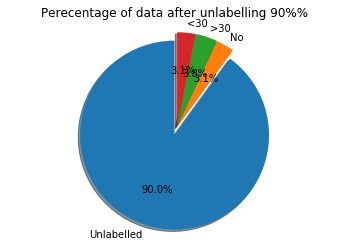

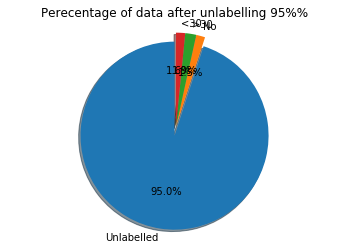

In [9]:
plot_pie_chart(['Unlabelled'] + classes, y_ssl_10, '10%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_20, '20%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_50, '50%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_90, '90%', 'ssl')
plot_pie_chart(['Unlabelled'] + classes, y_ssl_95, '95%', 'ssl')

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import time
import pandas as pd

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from pypcc import ParticleCompetitionAndCooperation
# https://github.com/tmadl/semisup-learn
from semisup_learn.frameworks.SelfLearning import *
from masksemi.masksemi import maskData

class Trainer:
    
    def __init__(self, X, y, folds, data_classes, classes):
        self.X = X
        self.y = y
        self.folds = folds
        self.data_classes = data_classes
        self.classes = classes
        
    def train_model(self, model_name, unlabelled_ratio=None):
        ssl = False
        if model_name in ['LabelProp', 'LabelSpread', 'SelfTrain']:
            ssl = True
            
        train_time   = []
        conf_mat     = np.zeros((len(self.data_classes), len(self.data_classes)))
#         print('conf_mat.shape', conf_mat.shape)
        recall       = []
        percision    = []
        f1_score     = []
        support      = []
        acc          = []
        balanced_acc = []
        neg_recall   = []

        for train, test in self.folds:
            if model_name == 'XGBoost':
                clf = GradientBoostingClassifier(random_state=0)
            elif model_name == 'AdaBoost':
                clf = AdaBoostClassifier(random_state=0)
            elif model_name == 'XTrees':
                clf = ExtraTreesClassifier()
            elif model_name == 'DT':
                clf = DecisionTreeClassifier(max_depth=5)
            elif model_name == 'KNN':
                clf = KNeighborsClassifier(n_neighbors=7)
            elif model_name == 'LabelProp':
                clf = LabelPropagation(kernel='knn')
            elif model_name == 'LabelSpread':
                clf = LabelSpreading(kernel='knn')
            elif model_name == 'SelfTrain':
                clf = SelfLearningModel(ExtraTreesClassifier())
            else:
                return None

            X_train = self.X[train]
            y_train = self.y[train]
            X_test  = self.X[test]
            y_test  = self.y[test]
            
            if model_name in ['LabelProp', 'LabelSpread', 'SelfTrain']:
                X_train, y_train = X_train, maskData(y_train, 1. - unlabelled_ratio)
            
#             if ssl:
#                 unlabelled_idx = np.where(y_test==-1)
# #                 print('y_test.shape, X_test.shape', y_test.shape, X_test.shape)
#                 X_test = np.delete(X_test, unlabelled_idx, axis=0)
#                 y_test = np.delete(y_test, unlabelled_idx)
# #                 print('y_test.shape, X_test.shape', y_test.shape, X_test.shape)

            # Training
            tic = time.time()
            clf.fit(X_train, y_train)
            toc = time.time()
            train_time.append(np.round(toc - tic, 3))
            
            y_pred = clf.predict(X_test)
#             print('np.unique(y_pred), np.unique(y_test)', np.unique(y_pred), np.unique(y_test))

            # Compute confusion matrix
            cm = confusion_matrix(y_test, y_pred)
#             print('cm.shape', cm.shape)
            conf_mat = conf_mat + cm

            FP = cm.sum(axis=0) - np.diag(cm)  
            FN = cm.sum(axis=1) - np.diag(cm)
            TP = np.diag(cm)
            TN = cm.sum() - (FP + FN + TP)

            # Specificity or true negative rate
            TNR = TN/(TN+FP) 
            neg_recall.append(TNR)

            p, r, f1, sup = precision_recall_fscore_support(y_test, y_pred)
            percision.append(p)
            recall.append(r)
            f1_score.append(f1)
            support.append(sup)

            acc.append(accuracy_score(y_test, y_pred))
            balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
        
        def one_hot(x):
            b = np.zeros((x.size, x.max() + 1))
            b[np.arange(x.size), x] = 1
            return b
        
        y = one_hot(self.y)
        X_train, X_test, y_train, y_test = train_test_split(self.X, y, test_size=.1, random_state=0, stratify=y)
#         # ROC COMPUTATION
#         # shuffle and split training and test sets
#         b = np.zeros((self.y.size, self.y.max() + 1))
#         b[np.arange(self.y.size), self.y] = 1
#         y = b
#         print('np.unique(y)', np.unique(y))
#         X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=.1, random_state=0, stratify=self.y)
#         print('y_train.shape, y_test.shape', y_train.shape, y_test.shape)
#         print('np.unique(y_test), np.unique(y_train)', np.unique(y_test), np.unique(y_train))
        if model_name in ['LabelProp', 'LabelSpread', 'SelfTrain']:
            y_train = np.argmax(y_train, axis=1)
            X_train, y_train = X_train, maskData(y_train, 1. - unlabelled_ratio)
#             print('X_train.shape, y_train.shape', X_train.shape, y_train.shape)
#             print('np.unique(y_test), np.unique(y_train)', np.unique(y_test), np.unique(y_train))

        if model_name == 'XGBoost':
            clf = OneVsRestClassifier(GradientBoostingClassifier(random_state=0))
        elif model_name == 'AdaBoost':
            clf = OneVsRestClassifier(AdaBoostClassifier(random_state=0))
        elif model_name == 'XTrees':
            clf = OneVsRestClassifier(ExtraTreesClassifier())
        elif model_name == 'DT':
            clf = OneVsRestClassifier(DecisionTreeClassifier(max_depth=5))
        elif model_name == 'KNN':
            clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
        elif model_name == 'LabelProp':
            clf = OneVsRestClassifier(LabelPropagation(kernel='knn'))
        elif model_name == 'LabelSpread':
            clf = OneVsRestClassifier(LabelSpreading(kernel='knn'))
        elif model_name == 'SelfTrain':
            clf = SelfLearningModel(ExtraTreesClassifier())
        else:
            return None
        
        y_score = clf.fit(X_train, y_train).predict_proba(X_test)
#         if model_name in ['LabelProp', 'LabelSpread']:
#             y_score = y_score[:,1:]
        n_classes = len(self.data_classes)
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        tables = []
        t = PrettyTable([model_name, 'Avg. Accross 10 Folds'])
        t.add_row(['Training Time', np.mean(train_time)])
        t.add_row(['Accuracy', np.mean(acc)])
    #     t.add_row(['Balanced Accuracy', np.mean(balanced_acc)])
        tables.append(t)

        percision = np.array(percision)
        recall    = np.array(recall)
        f1_score  = np.array(f1_score)
        support   = np.array(support)

        t = PrettyTable(['Metric / Class'] + self.classes)
        t.add_row(['Percision'] + np.mean(percision, axis=0).tolist())
        t.add_row(['Recall'] + np.mean(recall, axis=0).tolist())
        t.add_row(['Specificity'] + np.mean(neg_recall, axis=0).tolist())
        t.add_row(['F1-score'] + np.mean(f1_score, axis=0).tolist())
    #     t.add_row(['Support'] + np.mean(support, axis=0).tolist())
        tables.append(t)

        conf_mat = conf_mat.T # since rows and  cols are interchanged

        t = PrettyTable([''] + self.classes)
        for i, cls in enumerate(self.classes):
            t.add_row([cls] + conf_mat[i].tolist())
        tables.append(t)

        avg_acc = np.trace(conf_mat) / sum(self.data_classes)
        conf_mat_norm = conf_mat / (self.data_classes) # Normalizing the confusion matrix
        tables.append(conf_mat_norm)

        metrics = {
            'clf': clf,
            'percision': percision,
            'recall': recall,
            'f1_score': f1_score,
            'specificity': neg_recall,
            'support': support,
            'conf_mat': conf_mat,
            'acc': acc,
            'balanced_acc': balanced_acc,
            'train_time': train_time,
            'roc_auc': roc_auc or [],
            'fpr': fpr or [],
            'tpr': tpr or [],
        }

        return tables, metrics

/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))


----------------SSL LabelProp - 0% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         79.705        |
|    Accuracy   |   0.8492605872677729  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7906912379399987 | 0.8663099999081758 | 0.8902204130720006 |
|     Recall     | 0.827296715310706  | 0.843015801479787  | 0.8782846265365014 |
|  Specificity   | 0.9022936088249904 | 0.9212411614347145 | 0.9502451199951614 |
|    F1-score    | 0.8085684674536052 | 0.8544703375155285 | 0.8841706418214914 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---

/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:197: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


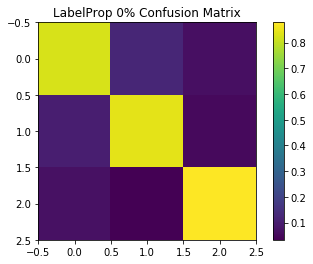

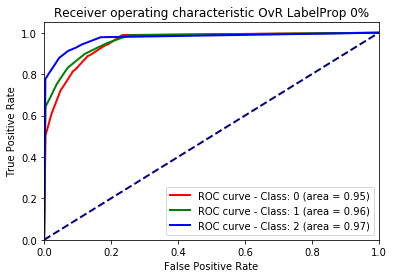

-----------------------------------------------------------------------


In [ ]:
tables, labelProp_metrics_0 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.0)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 0% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 0%')
plot_roc(labelProp_metrics_0, data_classes_15, cls2clr, 'LabelProp 0%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_0 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.0)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 0% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 0%')
plot_roc(labelSpread_metrics_0, data_classes_15, cls2clr, 'LabelSpread 0%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_0 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.0)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 0% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 0%')
plot_roc(selftrain_metrics_0, data_classes_15, cls2clr, 'SelfTrain 0%')

/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encou

----------------SSL LabelProp - 10% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   77.02340000000001   |
|    Accuracy   |   0.8168963224936301  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7475917530800062 | 0.867271140764092  | 0.8867472766582027 |
|     Recall     | 0.8351122680989137 | 0.8006214171466949 | 0.8185315908832133 |
|  Specificity   | 0.8507441408532067 | 0.9246596423718699 | 0.9519258342667474 |
|    F1-score    | 0.7810855457414893 | 0.8272804500397068 | 0.8385324564277006 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

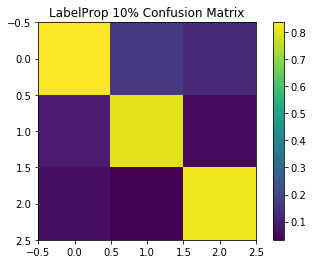

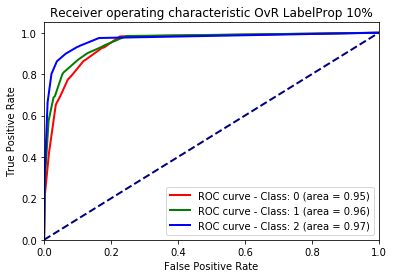

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:401: RuntimeWarning: divide by zero encountered in true_divide
  affinity_matrix.data /= np.diag(np.array(normalizer))
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.labe

----------------SSL LabelProp - 20% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   78.35249999999999   |
|    Accuracy   |   0.795007606709694   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.732905908768555  | 0.857077370841109  | 0.879175615074286  |
|     Recall     | 0.8307261370636947 | 0.7606437995255896 | 0.8011552090381713 |
|  Specificity   | 0.8218796411716515 | 0.9234340208709788 | 0.9502256422075905 |
|    F1-score    | 0.7663533162464593 | 0.7842185509708851 | 0.8150921671305195 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

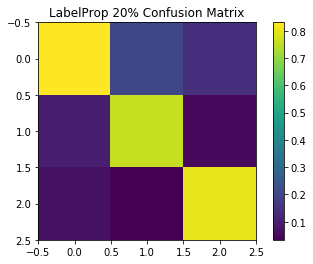

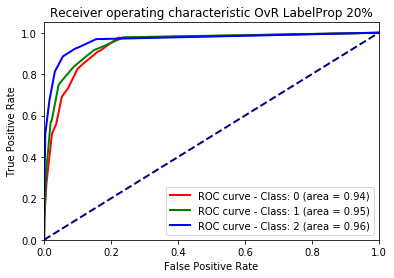

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 50% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   81.65129999999999   |
|    Accuracy   |   0.7572723894649717  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6653709149483412 | 0.8416416023169889 | 0.8813346277531549 |
|     Recall     | 0.8292057011724593 | 0.6951911086536363 | 0.7611222797333745 |
|  Specificity   | 0.7641728732810569 | 0.9267665635493685 | 0.9503625480291082 |
|    F1-score    | 0.7257614154855376 | 0.7294344426931353 | 0.7751931875172497 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

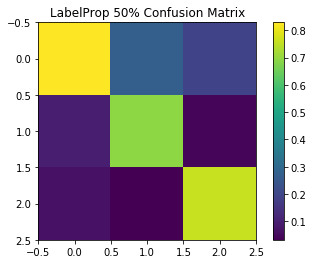

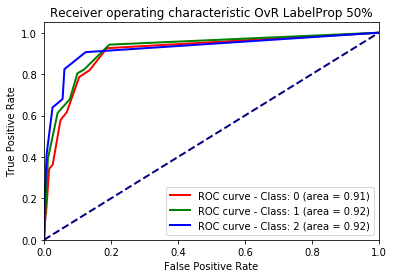

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 90% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        80.5291        |
|    Accuracy   |   0.5083449471944169  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+---------------------+
| Metric / Class |         No         |        >30         |         <30         |
+----------------+--------------------+--------------------+---------------------+
|   Percision    | 0.3863027710079031 | 0.8330191493926865 |  0.8400088845818658 |
|     Recall     | 0.9600915287090119 | 0.2761924329128274 | 0.34355204251618904 |
|  Specificity   | 0.3119064487629658 | 0.9869271493182168 |  0.9888023035490813 |
|    F1-score    | 0.5501344012748681 | 0.4126823053494214 | 0.48701026848604256 |
+----------------+--------------------+--------------------+---------------------+
+-----+---------+----

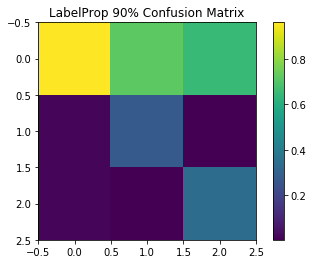

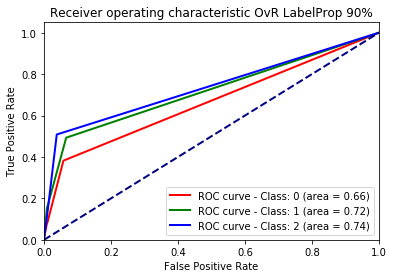

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions

----------------SSL LabelProp - 95% Unlabelled----------------
+---------------+-----------------------+
|   LabelProp   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   80.98089999999999   |
|    Accuracy   |   0.424234562613744   |
+---------------+-----------------------+
+----------------+---------------------+---------------------+---------------------+
| Metric / Class |          No         |         >30         |         <30         |
+----------------+---------------------+---------------------+---------------------+
|   Percision    |  0.3482631509981082 |  0.8455753725455786 |  0.8529823976567388 |
|     Recall     |  0.9819783472847149 | 0.15200749614020737 |  0.2035269638825612 |
|  Specificity   | 0.17762897387102203 |  0.9942806795431324 |  0.994879915487556  |
|    F1-score    |  0.5139498295850425 |  0.2565612596506481 | 0.32814742288615534 |
+----------------+---------------------+---------------------+---------------------+
+----

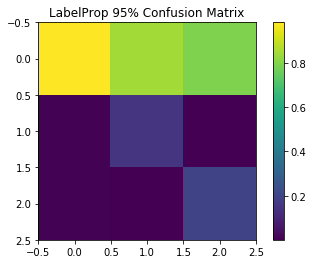

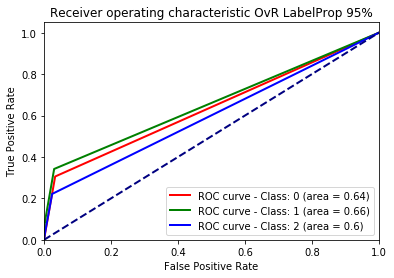

-----------------------------------------------------------------------


In [10]:
tables, labelProp_metrics_10 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 10%')
plot_roc(labelProp_metrics_10, data_classes_15, cls2clr, 'LabelProp 10%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_20 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 20%')
plot_roc(labelProp_metrics_20, data_classes_15, cls2clr, 'LabelProp 20%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_50 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 50%')
plot_roc(labelProp_metrics_50, data_classes_15, cls2clr, 'LabelProp 50%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_90 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 90%')
plot_roc(labelProp_metrics_90, data_classes_15, cls2clr, 'LabelProp 90%')

print('-----------------------------------------------------------------------')

tables, labelProp_metrics_95 = trainer.train_model(model_name='LabelProp', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelProp - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelProp 95%')
plot_roc(labelProp_metrics_95, data_classes_15, cls2clr, 'LabelProp 95%')

print('-----------------------------------------------------------------------')

----------------SSL LabelSpread - 10% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.3916        |
|    Accuracy   |   0.8413706198172057  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7818128468579972 | 0.858876255289395  | 0.8825906562785816 |
|     Recall     | 0.816787682594342  | 0.8326401107883571 | 0.8759422799799544 |
|  Specificity   | 0.8982838391340404 | 0.9171772371444147 | 0.9464734321984745 |
|    F1-score    | 0.798899392580183  | 0.8455090359390229 | 0.8792091730306584 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+

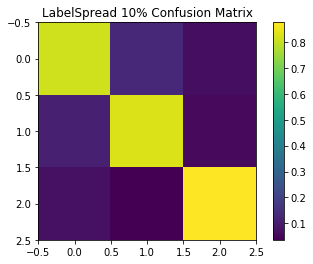

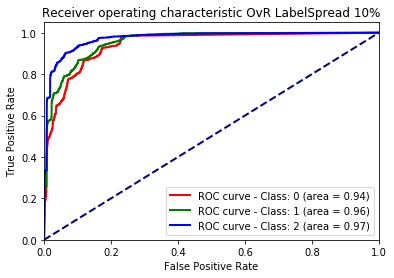

-----------------------------------------------------------------------
----------------SSL LabelSpread - 20% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.6086        |
|    Accuracy   |   0.8381958901339568  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7775120129566918 | 0.8564188194163336 | 0.8797170350091952 |
|     Recall     | 0.8124890738593902 | 0.8290158444014386 | 0.8744090058258145 |
|  Specificity   | 0.8962691836971002 | 0.9158443291804472 | 0.9450859271705628 |
|    F1-score    | 0.7946060564981428 | 0.8424555912425407 | 0.8770128774721538 |
+----------------+-------------------

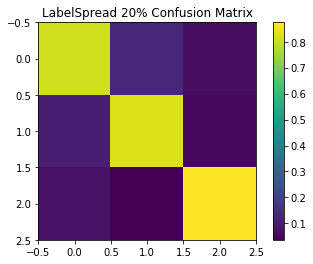

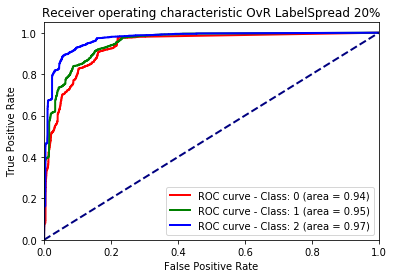

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 50% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   77.04209999999999   |
|    Accuracy   |   0.8230992618647714  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7546941018346367 | 0.8439961004685198 | 0.8703817400999261 |
|     Recall     | 0.7958138498758655 | 0.8113915830641263 | 0.8638899767417068 |
|  Specificity   | 0.8845306960540844 | 0.9092003561496614 | 0.9409430960693663 |
|    F1-score    | 0.7746487846524788 | 0.8273011662146628 | 0.8670847191257547 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+

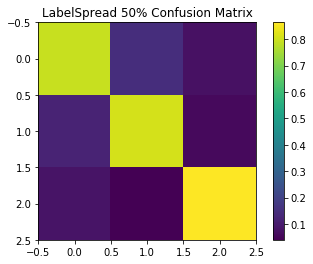

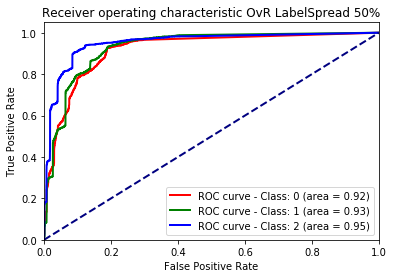

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 90% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.7636        |
|    Accuracy   |   0.562678057024396   |
+---------------+-----------------------+
+----------------+--------------------+---------------------+---------------------+
| Metric / Class |         No         |         >30         |         <30         |
+----------------+--------------------+---------------------+---------------------+
|   Percision    | 0.4188087385354081 |  0.725800942674492  |  0.7658308403952053 |
|     Recall     | 0.7553847529362411 | 0.47400724113510095 | 0.47996635633851953 |
|  Specificity   | 0.5310139960345807 |  0.8919349095574193 |  0.9333605052479292 |
|    F1-score    | 0.538621007697354  |  0.5726343532308241 |  0.5884302669467312 |
+----------------+--------------------+---------------------+---------------------+
+-----+----

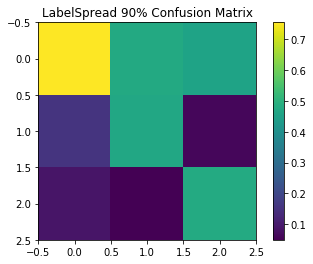

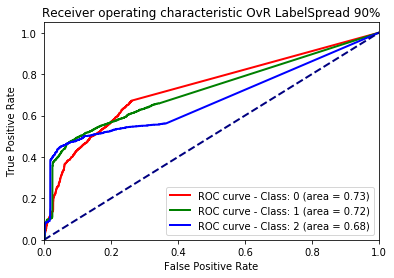

-----------------------------------------------------------------------


/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/home/yahyaalaa/Yahya/tf2/lib/python3.6/

----------------SSL LabelSpread - 95% Unlabelled----------------
+---------------+-----------------------+
|  LabelSpread  | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        77.5113        |
|    Accuracy   |  0.46147465204618604  |
+---------------+-----------------------+
+----------------+---------------------+--------------------+---------------------+
| Metric / Class |          No         |        >30         |         <30         |
+----------------+---------------------+--------------------+---------------------+
|   Percision    | 0.35344822341520815 | 0.6481473647452616 |  0.6971864426877253 |
|     Recall     |  0.7538650904101588 | 0.3494623810659971 |  0.3089740786430559 |
|  Specificity   |  0.3840463426207233 | 0.8863659280062153 |  0.9390477022892911 |
|    F1-score    |  0.4811607272509775 | 0.4534821757885988 | 0.42758117538938684 |
+----------------+---------------------+--------------------+---------------------+
+-----+----

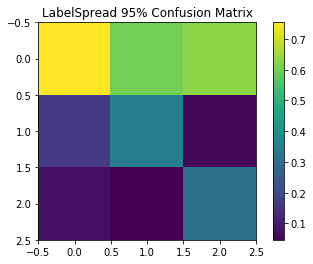

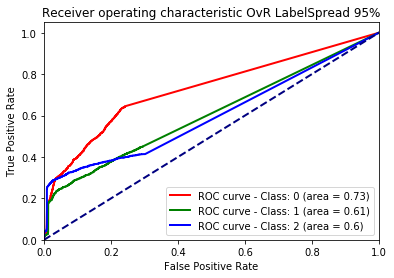

-----------------------------------------------------------------------


In [11]:
tables, labelSpread_metrics_10 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 10%')
plot_roc(labelSpread_metrics_10, data_classes_15, cls2clr, 'LabelSpread 10%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_20 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 20%')
plot_roc(labelSpread_metrics_20, data_classes_15, cls2clr, 'LabelSpread 20%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_50 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 50%')
plot_roc(labelSpread_metrics_50, data_classes_15, cls2clr, 'LabelSpread 50%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_90 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 90%')
plot_roc(labelSpread_metrics_90, data_classes_15, cls2clr, 'LabelSpread 90%')

print('-----------------------------------------------------------------------')

tables, labelSpread_metrics_95 = trainer.train_model(model_name='LabelSpread', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL LabelSpread - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'LabelSpread 95%')
plot_roc(labelSpread_metrics_95, data_classes_15, cls2clr, 'LabelSpread 95%')

print('-----------------------------------------------------------------------')

----------------SSL SelfTrain - 10% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   741.7092999999999   |
|    Accuracy   |   0.9438460956021395  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9204821057446029 | 0.9451772916872188 | 0.9663421874613999 |
|     Recall     | 0.9522756363946396 | 0.9282237631936738 | 0.9543034913548336 |
|  Specificity   | 0.9632923193620628 | 0.9674042207929908 | 0.9847374256008463 |
|    F1-score    | 0.9360996166665361 | 0.9366102326028439 | 0.9602748251982153 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+--

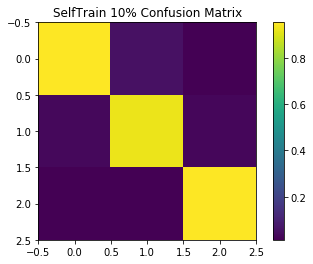

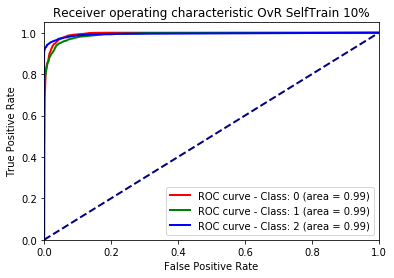

-----------------------------------------------------------------------
----------------SSL SelfTrain - 20% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        776.4821       |
|    Accuracy   |   0.937483322923711   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9121796463627169 | 0.9397731623371166 | 0.9608343199359636 |
|     Recall     | 0.9446324497227767 | 0.9217567831989507 | 0.9493206721770038 |
|  Specificity   | 0.9594182460767735 | 0.9642434991582475 | 0.9822360133562409 |
|    F1-score    | 0.9281151793499118 | 0.9306638465363367 | 0.9550330363127191 |
+----------------+--------------------+

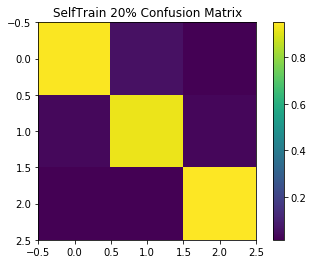

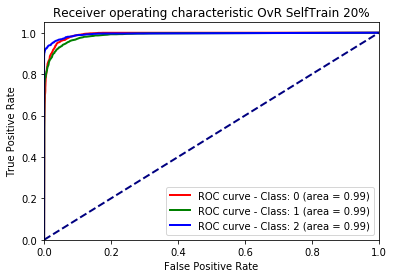

-----------------------------------------------------------------------
----------------SSL SelfTrain - 50% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   805.4755000000001   |
|    Accuracy   |   0.907932790741112   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8661701052321039 | 0.9151670697674111 | 0.9437850659667235 |
|     Recall     | 0.9191852088821555 | 0.8832393980364607 | 0.926493821358612  |
|  Specificity   | 0.9366187810129043 | 0.9504396599009898 | 0.9746731981595496 |
|    F1-score    | 0.8918776223363215 | 0.8988990728183319 | 0.9350451417638708 |
+----------------+--------------------+

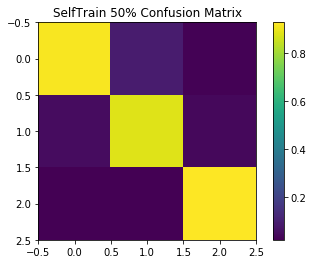

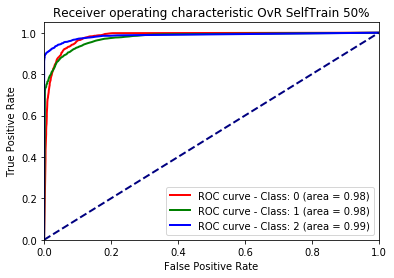

-----------------------------------------------------------------------
----------------SSL SelfTrain - 90% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   827.3915000000001   |
|    Accuracy   |   0.7898917943527514  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6513370421833246 | 0.853161280892605  | 0.9319085414141499 |
|     Recall     | 0.8806666256720261 | 0.7147419588179376 | 0.790937007519964  |
|  Specificity   | 0.7896129832700008 | 0.9254769714325333 | 0.9734615316177454 |
|    F1-score    | 0.7487819322447177 | 0.7777764361511574 | 0.855608568558537  |
+----------------+--------------------+

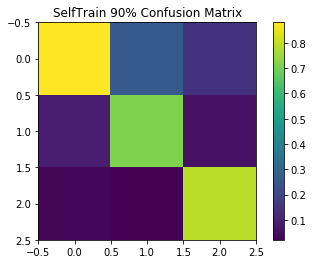

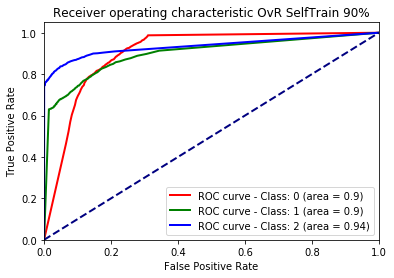

-----------------------------------------------------------------------
----------------SSL SelfTrain - 95% Unlabelled----------------
+---------------+-----------------------+
|   SelfTrain   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        829.5439       |
|    Accuracy   |   0.7395648897462199  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.5851116711775913 | 0.8164403506000877 | 0.9505685010840415 |
|     Recall     | 0.8761089773358739 | 0.6657076328582916 | 0.6941779386349478 |
|  Specificity   | 0.7222999979813448 | 0.9084701258763216 | 0.9834085104910854 |
|    F1-score    | 0.7013438024064235 | 0.7327330137257945 | 0.8023281850005908 |
+----------------+--------------------+

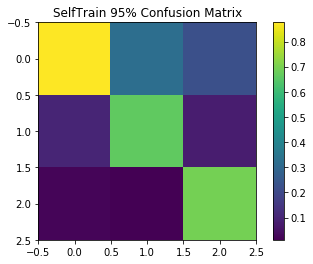

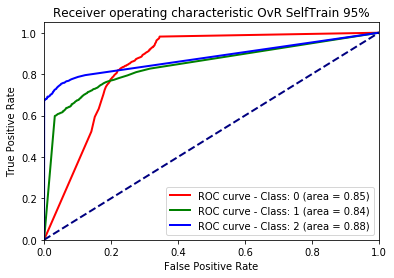

-----------------------------------------------------------------------


In [12]:
tables, selftrain_metrics_10 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.1)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 10% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 10%')
plot_roc(selftrain_metrics_10, data_classes_15, cls2clr, 'SelfTrain 10%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_20 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.2)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 20% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 20%')
plot_roc(selftrain_metrics_20, data_classes_15, cls2clr, 'SelfTrain 20%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_50 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.5)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 50% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 50%')
plot_roc(selftrain_metrics_50, data_classes_15, cls2clr, 'SelfTrain 50%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_90 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.9)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 90% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 90%')
plot_roc(selftrain_metrics_90, data_classes_15, cls2clr, 'SelfTrain 90%')

print('-----------------------------------------------------------------------')

tables, selftrain_metrics_95 = trainer.train_model(model_name='SelfTrain', unlabelled_ratio=0.95)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------SSL SelfTrain - 95% Unlabelled----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'SelfTrain 95%')
plot_roc(selftrain_metrics_95, data_classes_15, cls2clr, 'SelfTrain 95%')

print('-----------------------------------------------------------------------')

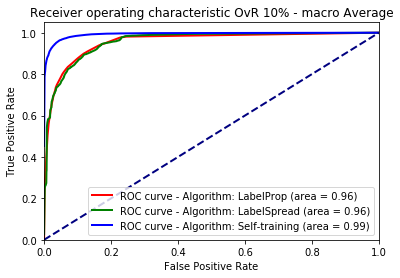

In [37]:
plot_roc_avg([labelProp_metrics_10,
                labelSpread_metrics_10,
                selftrain_metrics_10], 
               ['LabelProp',
                'LabelSpread',
                'Self-training'], 
               clf2clr,
               micro=False, macro=True, p='10%')

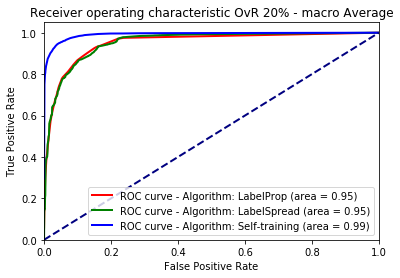

In [32]:
plot_roc_avg([labelProp_metrics_20,
                labelSpread_metrics_20,
                selftrain_metrics_20], 
               ['LabelProp',
                'LabelSpread',
                'Self-training'], 
               clf2clr,
               micro=False, macro=True, p='20%')

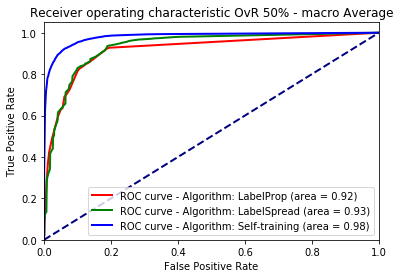

In [33]:
plot_roc_avg([labelProp_metrics_50,
                labelSpread_metrics_50,
                selftrain_metrics_50], 
               ['LabelProp',
                'LabelSpread',
                'Self-training'], 
               clf2clr,
               micro=False, macro=True, p='50%')

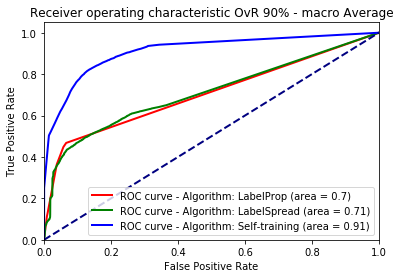

In [35]:
plot_roc_avg([labelProp_metrics_90,
                labelSpread_metrics_90,
                selftrain_metrics_90], 
               ['LabelProp',
                'LabelSpread',
                'Self-training'], 
               clf2clr,
               micro=False, macro=True, p='90%')

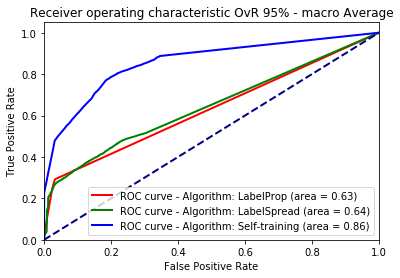

In [36]:
plot_roc_avg([labelProp_metrics_95,
                labelSpread_metrics_95,
                selftrain_metrics_95], 
               ['LabelProp',
                'LabelSpread',
                'Self-training'], 
               clf2clr,
               micro=False, macro=True, p='95%')